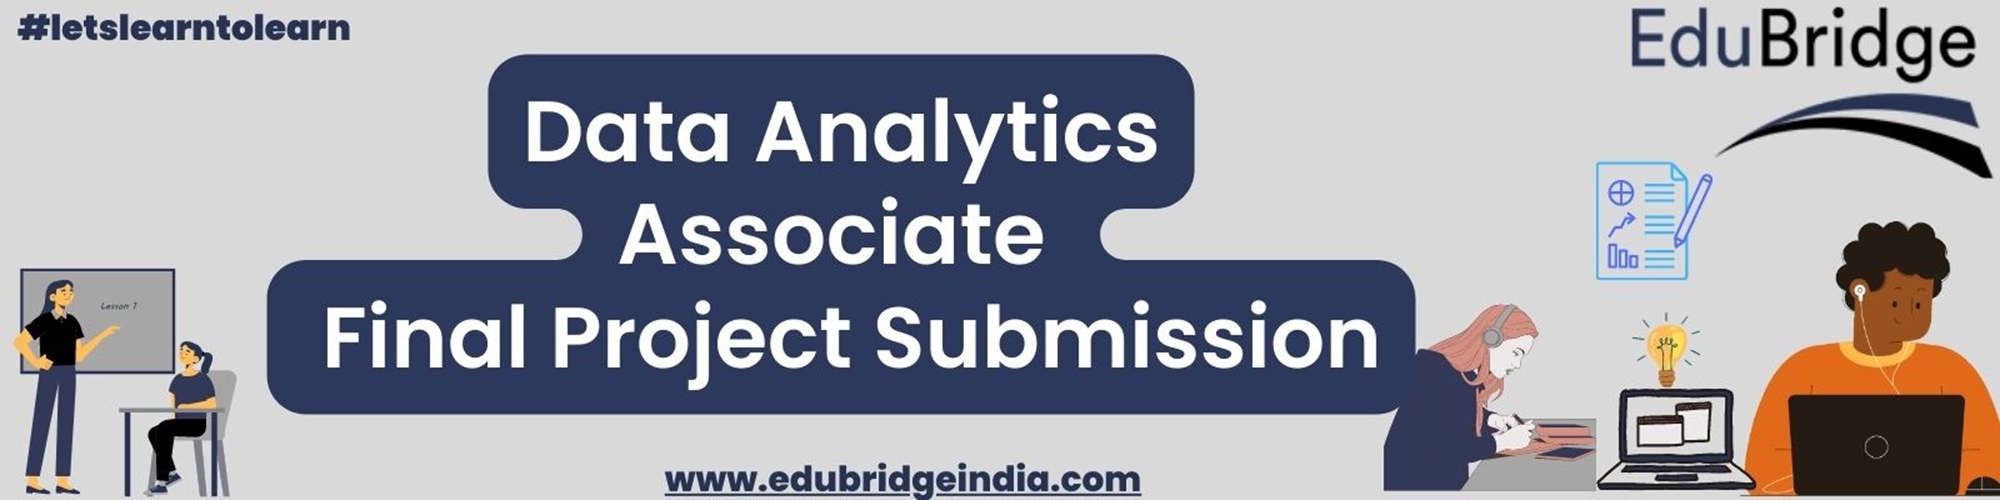

# Statement - Human Resources Analytics Prediction Using Machine Learning

# Objectives
This case study aims to model the probability of attrition of each employee from the HR Analytics Dataset, available on Kaggle. Its conclusions will allow the management to understand which factors urge the employees to leave the company and which changes should be made to avoid their departure.

# Inital analysis of the dataset

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [59]:
employees = pd.read_csv('HR_comma_sep.csv')
employees.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [60]:
employees.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [61]:
employees.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales salary  
14994                      0  support    low  
14995                      0  support    low  
14996                      0  support    low  
14997                      0  support    low  
14998                      0  support    low

# Data Preprocessing

In [62]:
employees['salary'] = pd.factorize(employees['salary'])[0]
employees['sales'] = pd.factorize(employees['sales'])[0]

In [63]:
employees.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
sales                      3.339823
salary                     0.594706
dtype: float64

# Check correlation between features

In [64]:
correlation_matrix = employees.corr(method='pearson')
correlation_matrix 

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
sales                            0.015413         0.011855        0.005577   
salary                           0.050022        -0.013002       -0.001803   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours               1.000000            0.127755   
time_spend_company                 0.127755            1.000000   
Work_accident                     -0.010143            0.002120   
left                               0.071287            0.144822   
promotion_last_5years             -0.003544            0.067433   
sales                             -0.002387           -0.001611   
salary                            -0.002242            0.048715   

                       Work_accident      left  promotion_last_5years  \
satisfaction_level          0.058697 -0.388375               0.025605   
last_evaluation            -0.007104  0.006567              -0.008684   
number_project             -0.004741  0.023787              -0.006064   
average_montly_hours       -0.010143  0.071287              -0.003544   
time_spend_company          0.002120  0.144822               0.067433   
Work_accident               1.000000 -0.154622               0.039245   
left                       -0.154622  1.000000              -0.061788   
promotion_last_5years       0.039245 -0.061788               1.000000   
sales                       0.019215 -0.043814               0.015170   
salary                      0.009247 -0.157898               0.098119   

                          sales    salary  
satisfaction_level     0.015413  0.050022  
last_evaluation        0.011855 -0.013002  
number_project         0.005577 -0.001803  
average_montly_hours  -0.002387 -0.002242  
time_spend_company    -0.001611  0.048715  
Work_accident          0.019215  0.009247  
left                  -0.043814 -0.157898  
promotion_last_5years  0.015170  0.098119  
sales                  1.000000  0.033415  
salary                 0.033415  1.000000

In [66]:
corr_left=pd.DataFrame(correlation_matrix['left'].drop('left').sort_values(ascending=False))
corr_left

left
time_spend_company     0.144822
average_montly_hours   0.071287
number_project         0.023787
last_evaluation        0.006567
sales                 -0.043814
promotion_last_5years -0.061788
Work_accident         -0.154622
salary                -0.157898
satisfaction_level    -0.388375

# Data Visualization

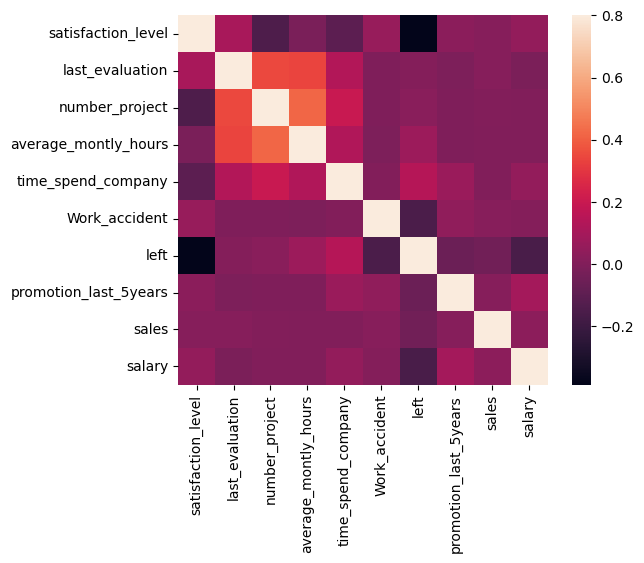

In [67]:
# To plot the correlation_matrix:
import seaborn as maps
maps.heatmap(correlation_matrix, vmax = .8, square = True)
plt.show()

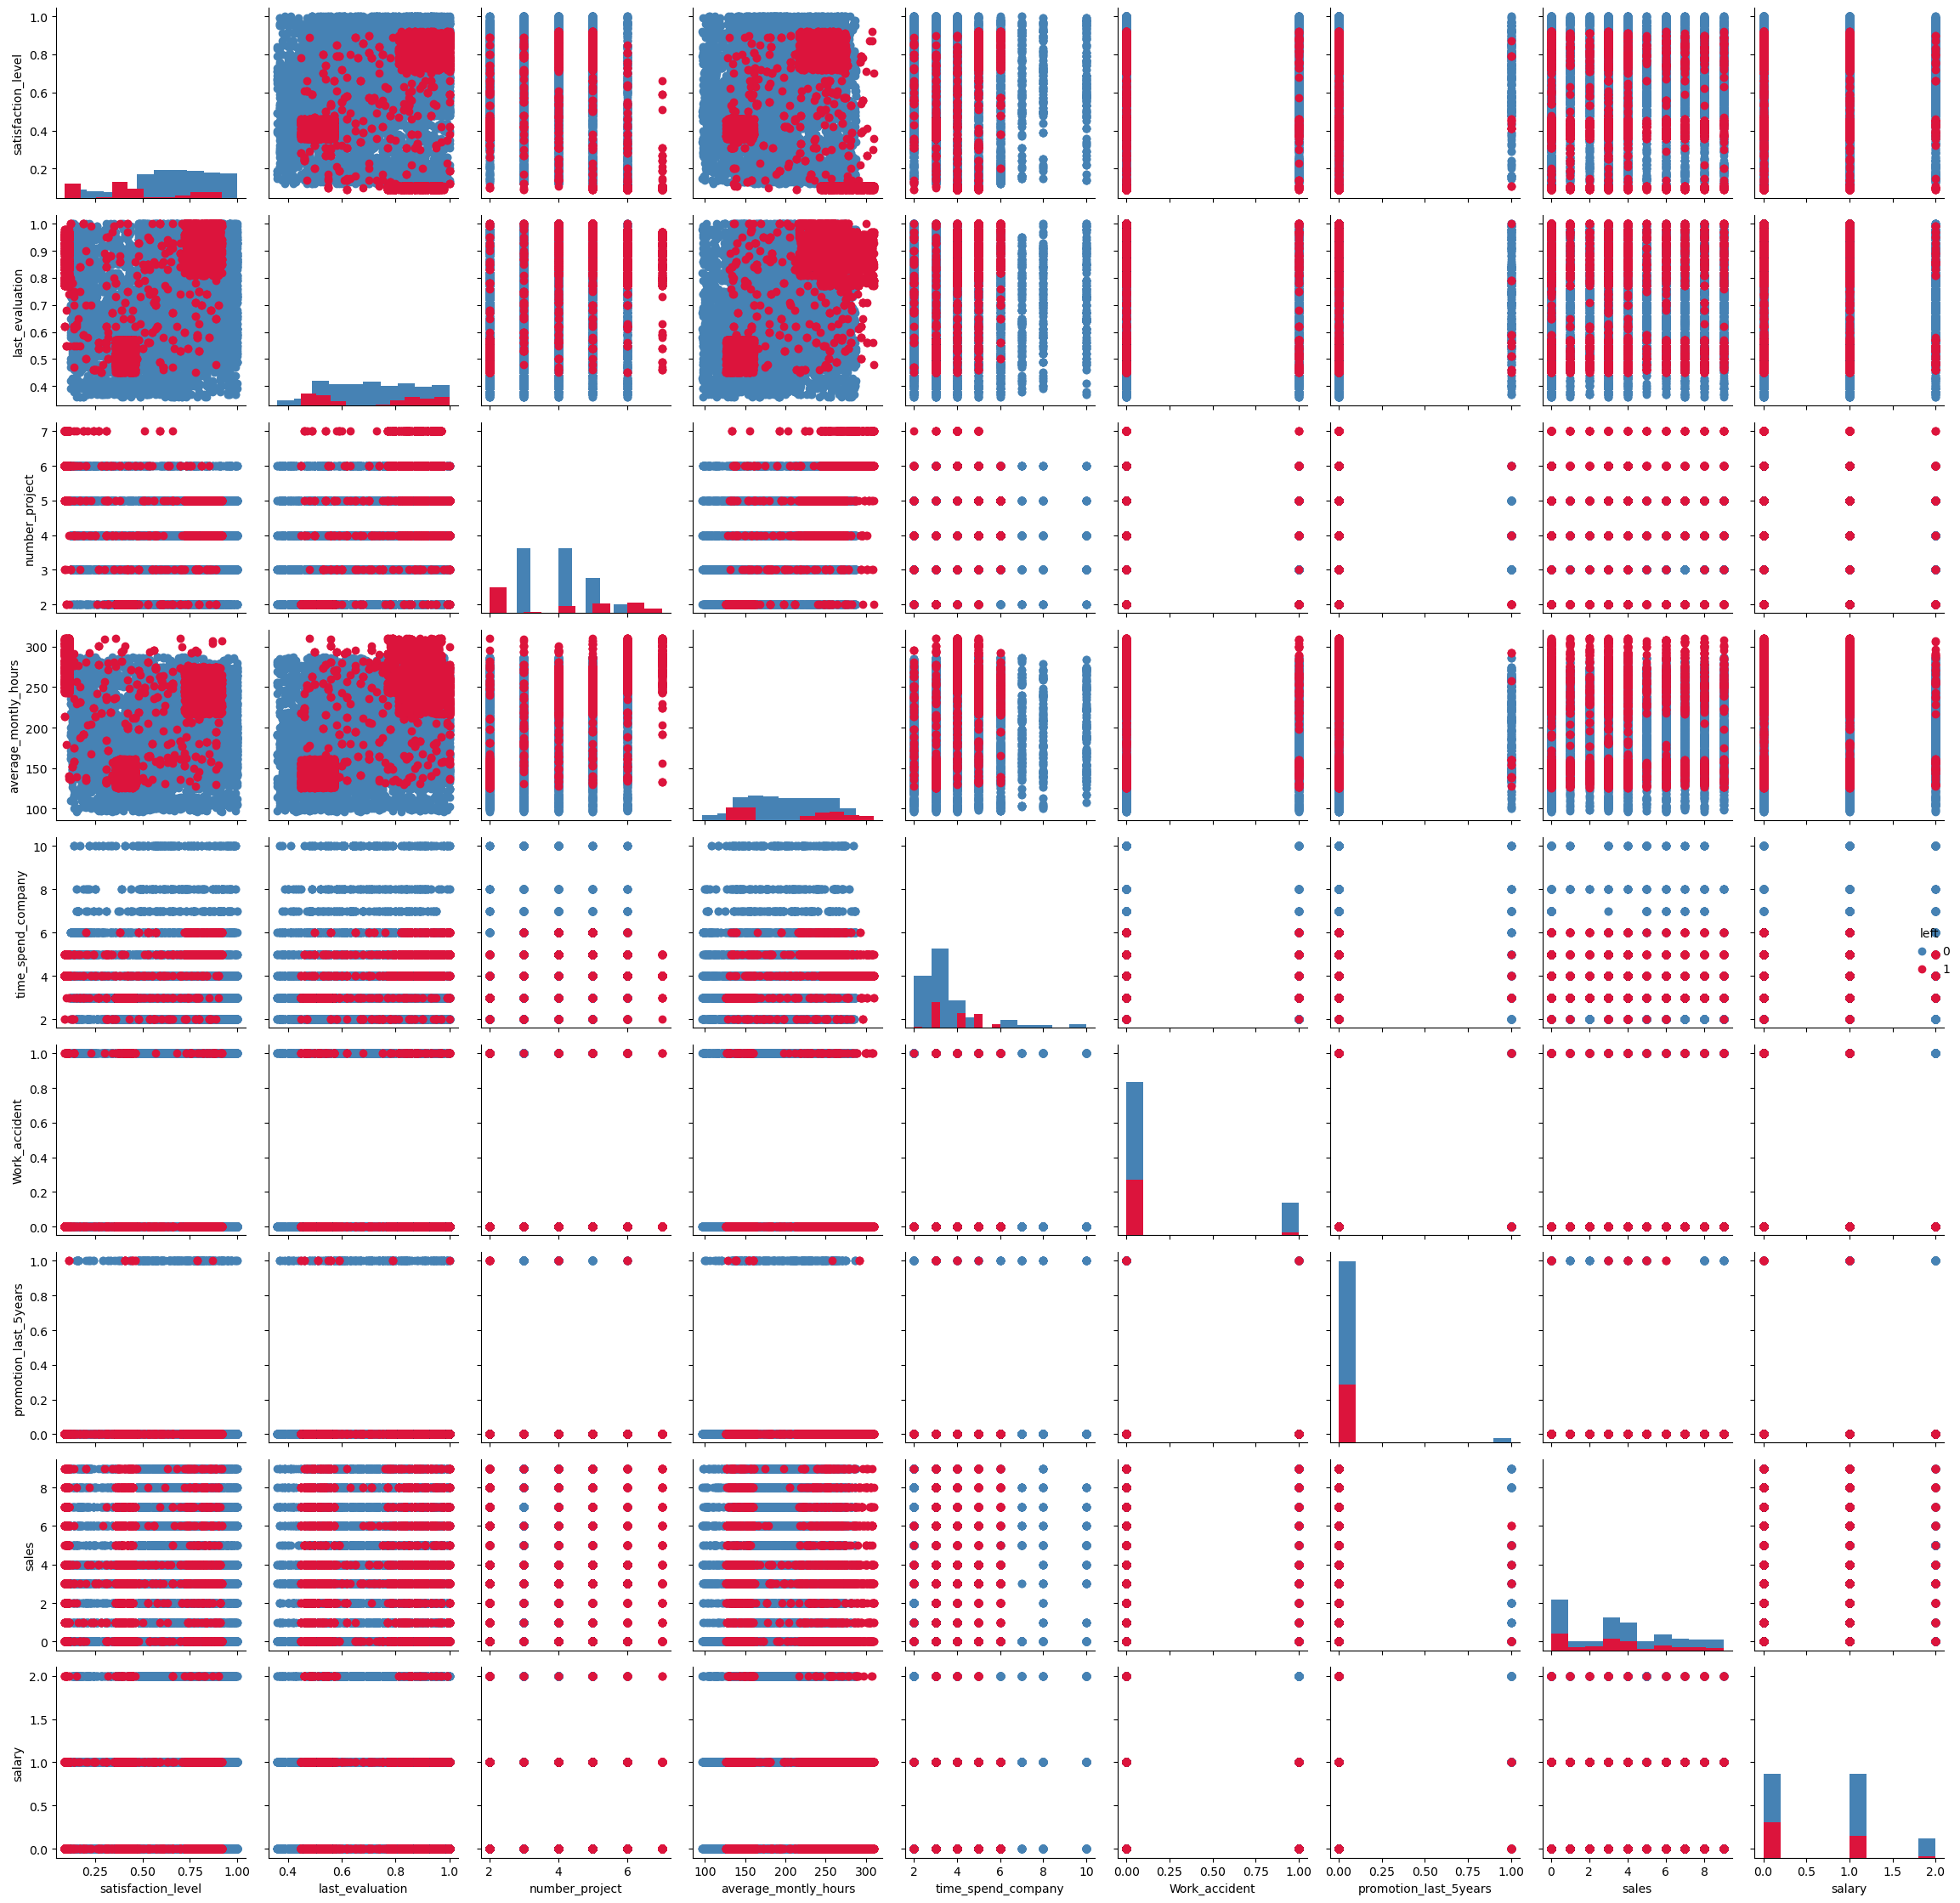

In [72]:
# Pair Plot
plot = sns.PairGrid(employees, hue='left', palette=('steelblue', 'crimson'))
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)
plot.add_legend()
plt.tight_layout()

# Train and test data

In [37]:
from sklearn.model_selection import train_test_split
X=employees.drop(columns=['left'])
y=employees.left
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3)

In [38]:
print("Ratio of workers who left in train:",y_train.sum()/y_train.count())
print("Ratio of workers who left in test:",y_test.sum()/y_test.count())

Ratio of workers who left in train: 0.23992399239923992
Ratio of workers who left in test: 0.2344


In [39]:
print("Accuracy:",1-y_test.sum()/y_test.size)

Accuracy: 0.7656000000000001


# Data Cleaning

<AxesSubplot:xlabel='salary', ylabel='left'>

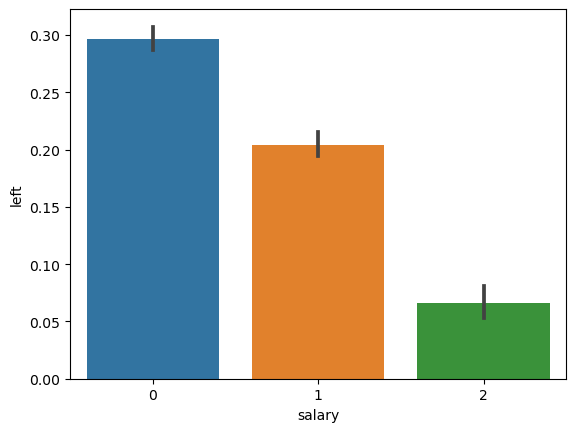

In [42]:
maps.barplot(x = 'salary', y = 'left', data = employees)

In [176]:
salary_encoder= {'low' : 0, 'medium' : 1, 'high' : 2}

X_train['salary']=X_train.salary.map(salary_encoder)
X_test['salary']=X_test.salary.map(salary_encoder)

In [177]:
X=X_train.copy()
X['left']=y_train

# Turnover by Salary Levels

In [71]:
# Salary Levels proportions and turnover rates
print('Salary Levels proportions')
print(employees['salary'].value_counts()/len(employees)*100)
print('\n')
print('Turnover Rate by Salary level')
print(employees.groupby('salary')['left'].mean())

Salary Levels proportions
0    48.776585
1    42.976198
2     8.247216
Name: salary, dtype: float64


Turnover Rate by Salary level
salary
0    0.296884
1    0.204313
2    0.066289
Name: left, dtype: float64


#The salary level seems to have a great impact on the employee turnover, as higher salaries tend to stay in the company (7% of turnover), whereas lower salaries tend to leave the company (30% of turnover).

# Turnover by Satisfaction Level

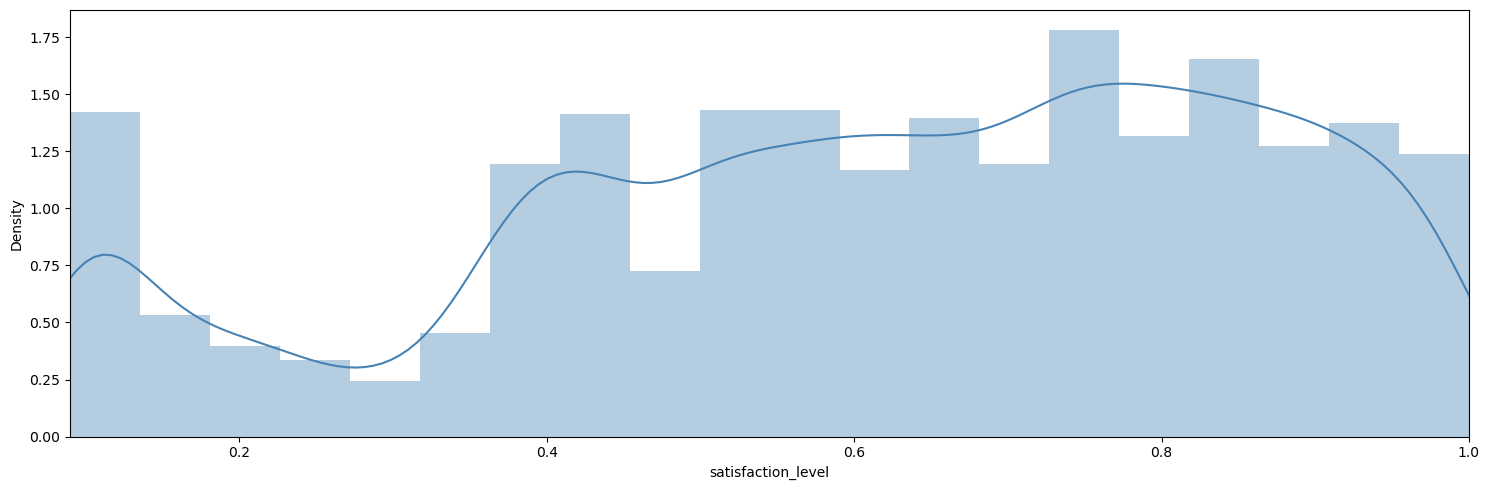

In [82]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(employees.satisfaction_level,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(employees.satisfaction_level),max(employees.satisfaction_level))
plt.tight_layout()

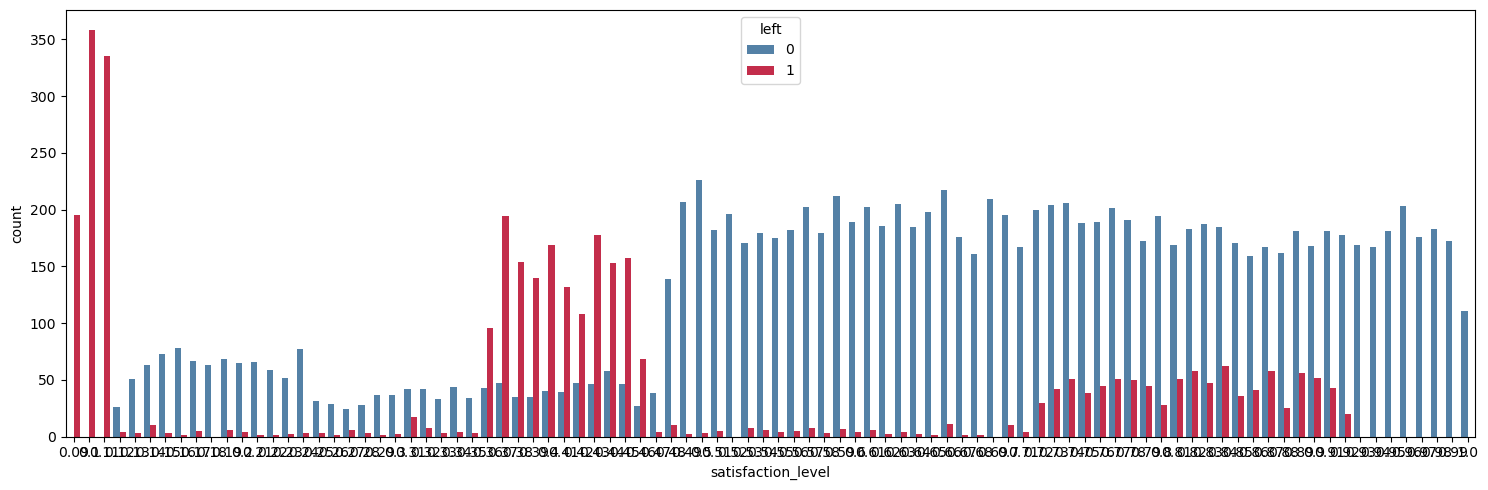

In [83]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(employees['satisfaction_level'],
              hue = employees['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

The satsfaction level shows 3 intresting areas:
1.Employees leave the company below 0.12.
2.There is a high rate of departure between 0.36 and 0.46.
3.Turnover rate is higher between 0.72 and 0.92.
#Employees with very low satisfaction level obviously leave the company. The risky zone is when employees rates their satisfaction just below 0.5. Employees also tend to leave the company when they become moderately satisfied.

# Turnover by Last Evaluation

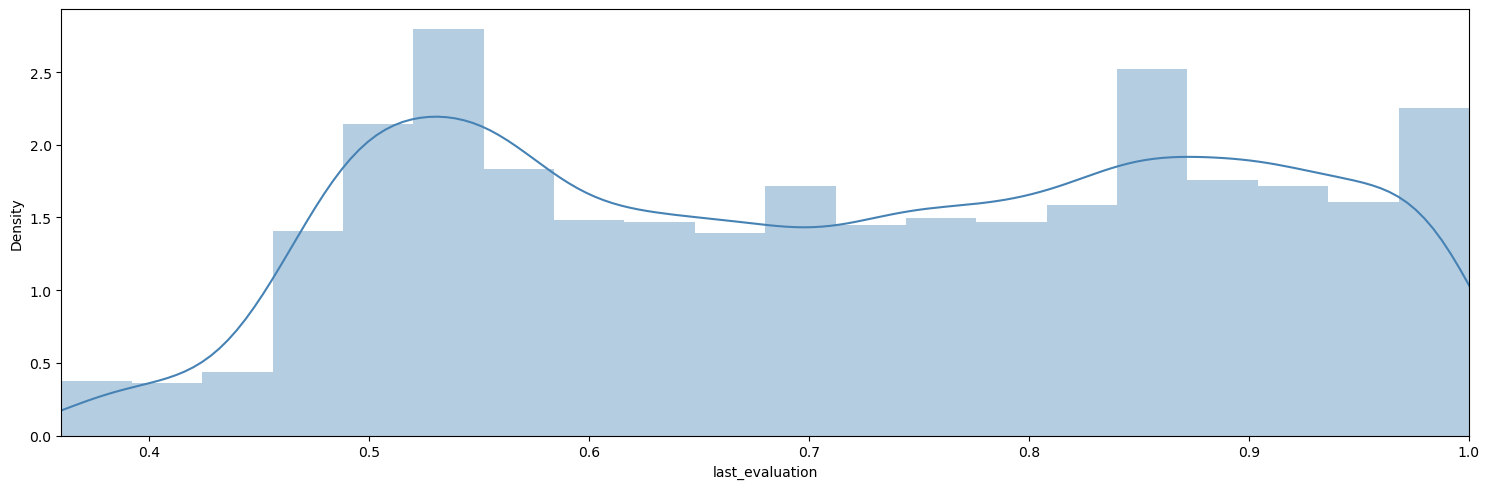

In [84]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(employees.last_evaluation,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(employees.last_evaluation),max(employees.last_evaluation))
plt.tight_layout()

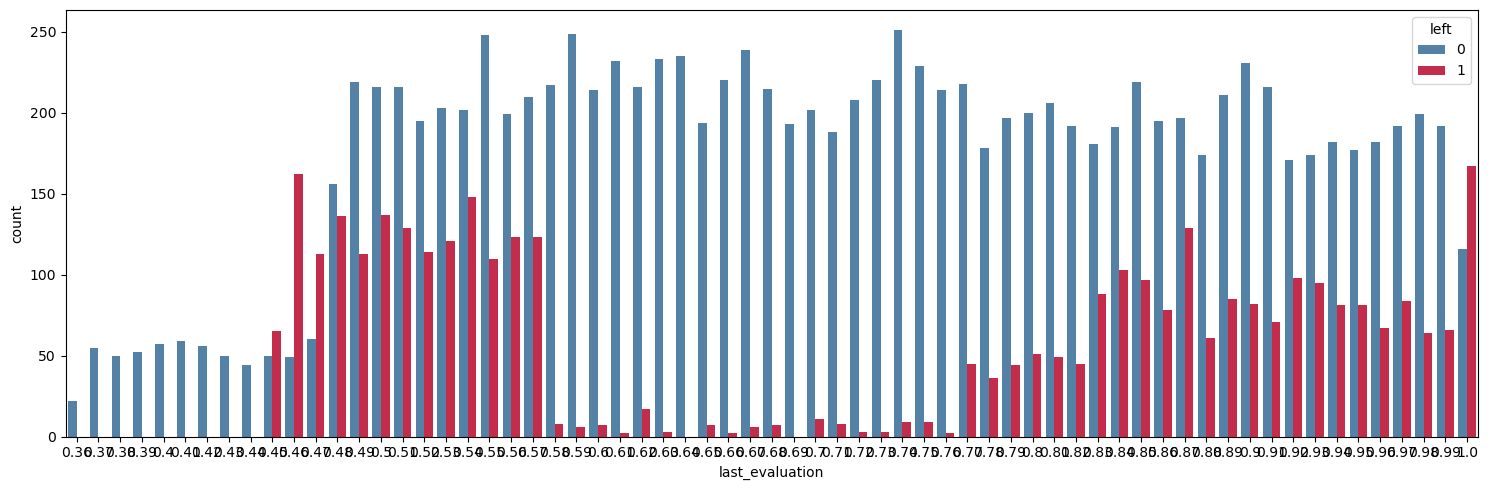

In [85]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(employees['last_evaluation'],
              hue = employees['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

The Last Evaluation shows 2 interesting areas:
1.Turnover rate is higher between 0.45 and 0.57.
2.Turnover rate is higher above 0.77.
Employees with low evaluation scores tend to leave the company. A large number of good employees leave the company, maybe to get a better opportunity. Interestingly, the ones with very low scores seem to stay.

# Turnover by Number of Projects

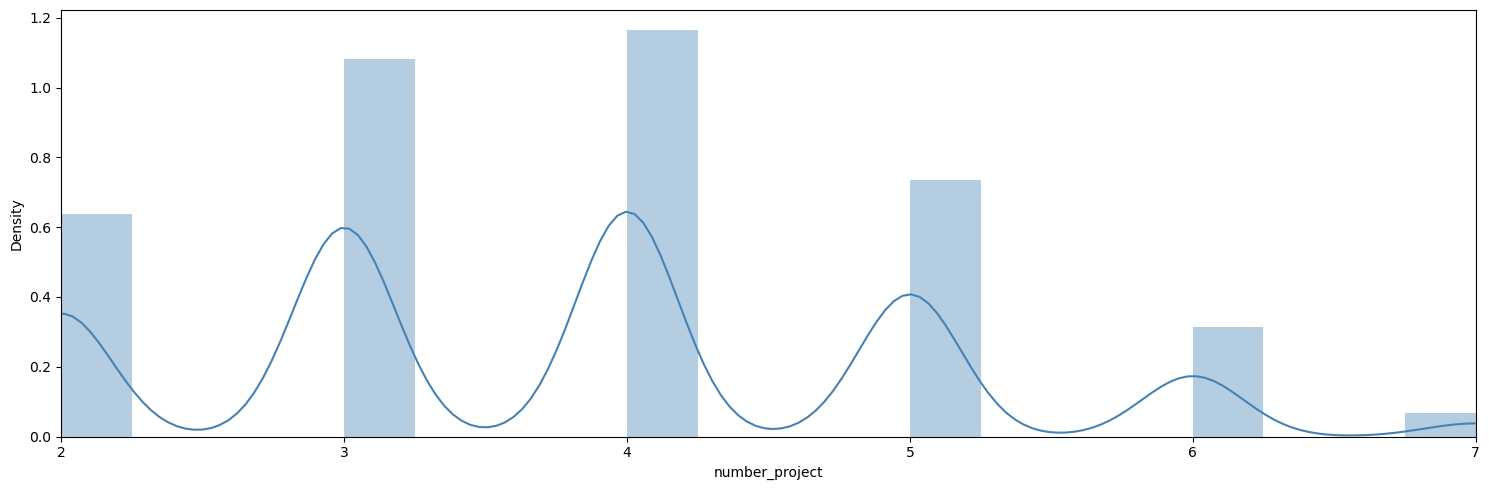

In [87]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(employees.number_project,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(employees.number_project),max(employees.number_project))
plt.tight_layout()


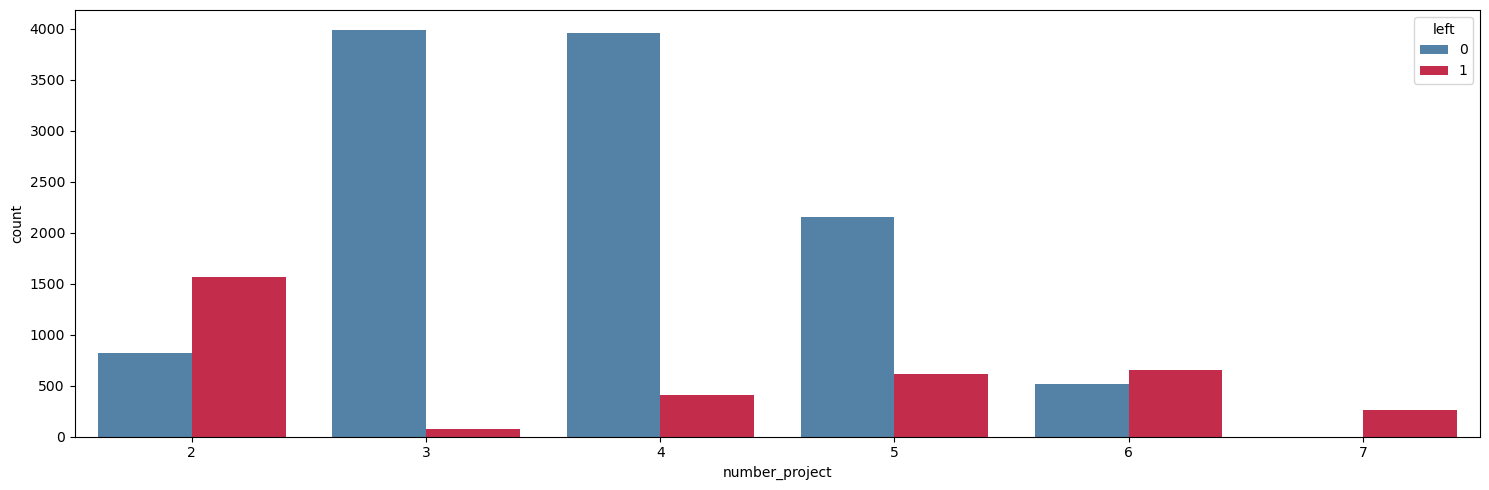

In [99]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(employees['number_project'],
              hue = employees['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

The main observation regarding the number of projects is that employees with only 2 or more than 5 projects have a higher probability to leave the company.

# Turnover by Average Monthly Hours

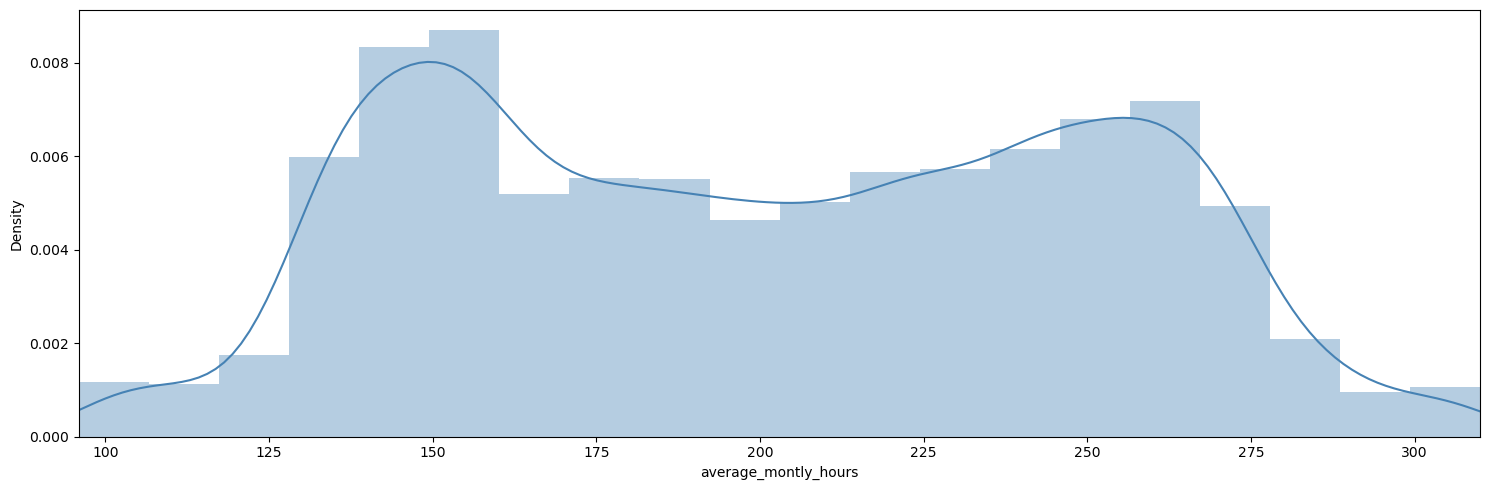

In [89]:
# Bar Plot
plt.figure(figsize=(15,5))
sns.distplot(employees.average_montly_hours,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(employees.average_montly_hours),max(employees.average_montly_hours))
plt.tight_layout()

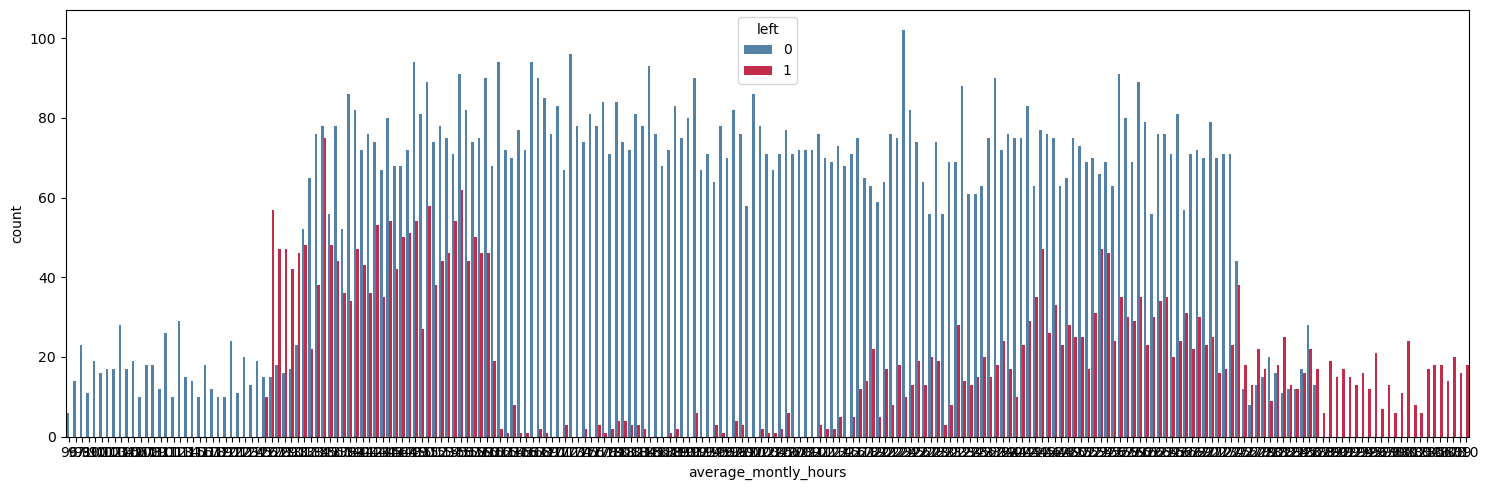

In [90]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(employees['average_montly_hours'],
              hue = employees['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

The Average Monthly Hours shows 5 interesting areas:
1.Turnover rate is 0% below 125 hours.
2.Turnover rate is high between 126 and 161 hours.
3.Turnover rate is moderate between 217 and 274 hours.
4.Turnover rate is roughly around 50% between 275 and 287 hours.
5.Turnover rate is 100% above 288 hours.
Employees with really low numbers of hours per month (below 125) tend to stay in the company, whereas employees working too many hours (above 275 hours) have a high probability to leave the company. A 'safe' range is between 161 and 217 hours, which seems to be ideal to keep employees in the company.

# Turnover by Time Spent in the Company

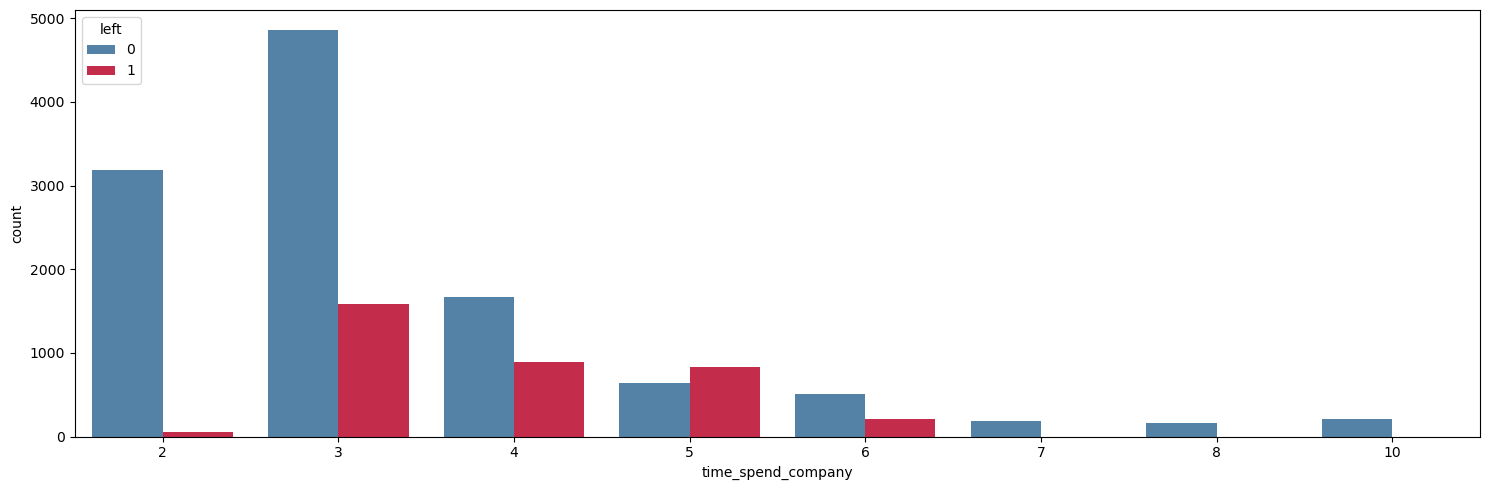

In [91]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(employees['time_spend_company'],
              hue = employees['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

It seems that employees with 3-6 years of services are leaving the company.

# Turnover by Work Accident

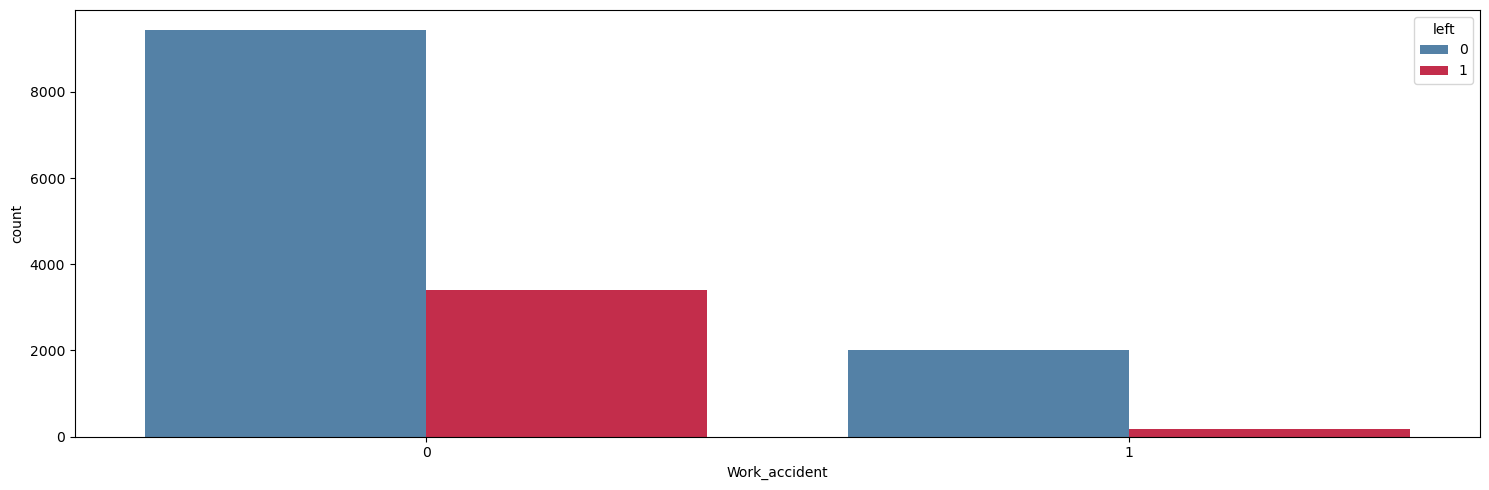

In [93]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(employees['Work_accident'],
              hue = employees['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with a work accident tend to stay in the company.

# Turnover by Promotion within the past 5 years

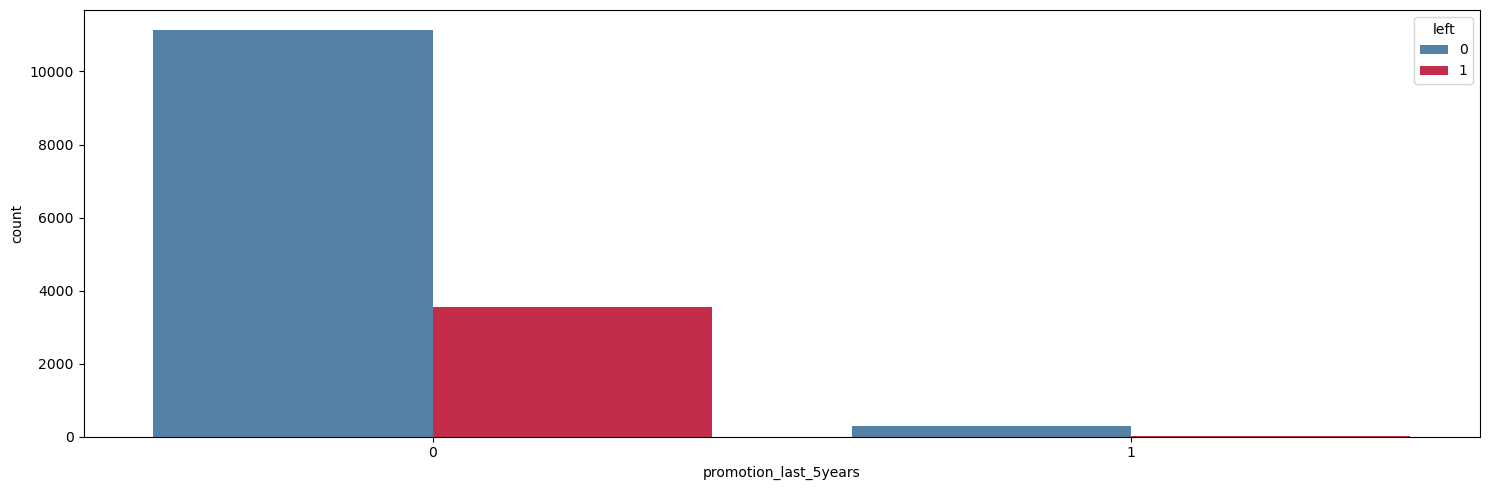

In [94]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.countplot(employees['promotion_last_5years'],
              hue = employees['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

# Number of Projects vs Average Monthly Hours

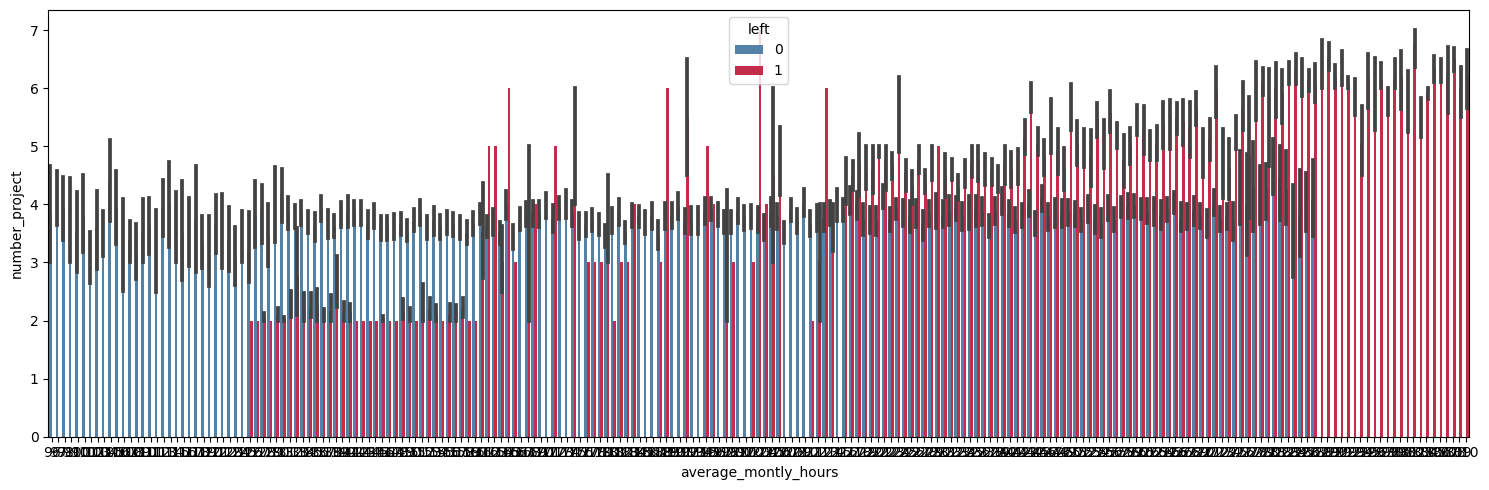

In [97]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=employees.average_montly_hours,
            y=employees.number_project,
            hue=employees.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

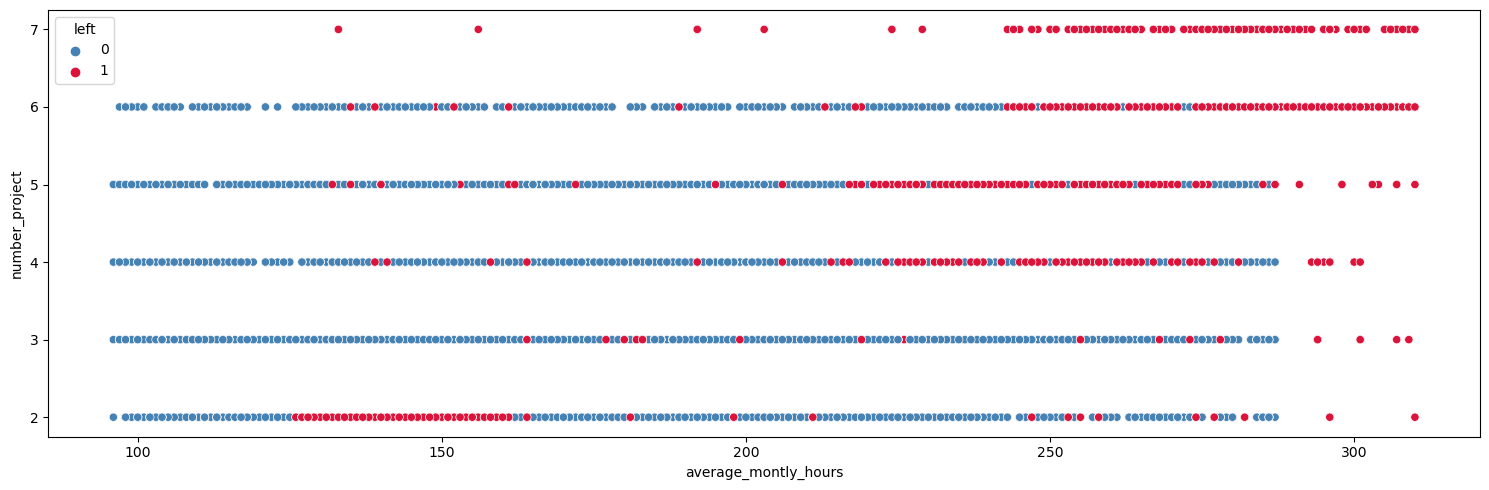

In [110]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=employees.average_montly_hours,
            y=employees.number_project,
            hue=employees.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

It appears that:
employees with more than 4 projects and working more than 217 hours tend to leave the company.
employees with less than 3 projects and working less than 161 hours tend to leave the company.
A high or a low workload seem to push employees out.

# Number of Projects vs Last Evaluation

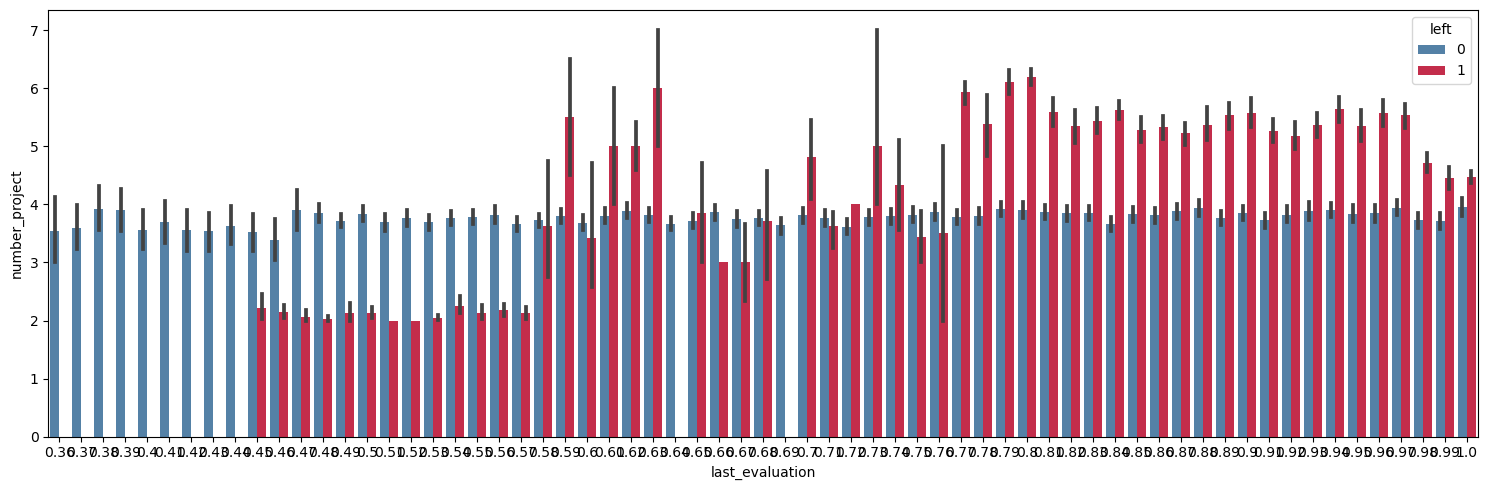

In [102]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=employees.last_evaluation,
            y=employees.number_project,
            hue=employees.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

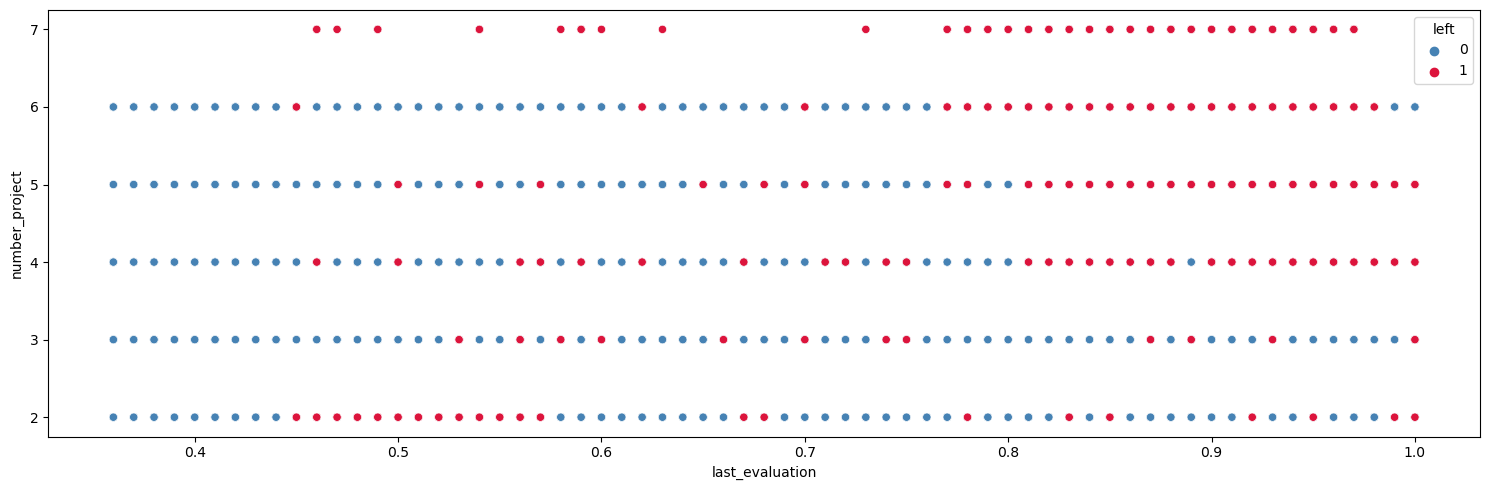

In [112]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=employees.last_evaluation,
            y=employees.number_project,
            hue=employees.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with more than 4 projects seem to have higher evaluations but leave the company. Employees with 2 projects and a low evaluation leave the company.

# Last Evaluation vs Average Monthly Hours

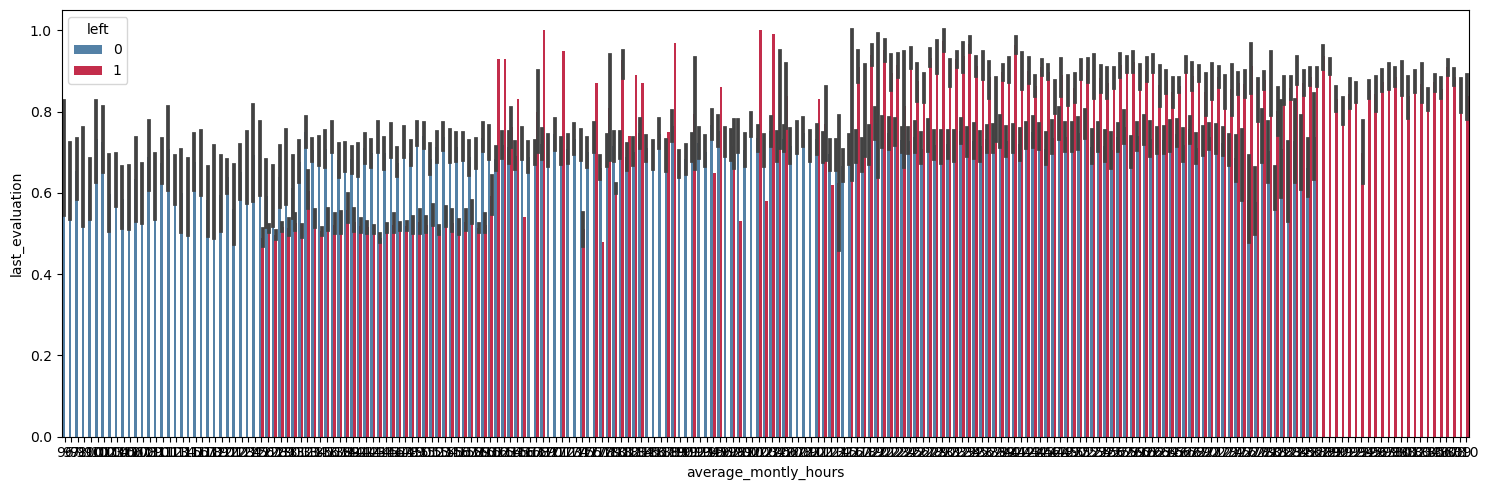

In [104]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=employees.average_montly_hours,
            y=employees.last_evaluation,
            hue=employees.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

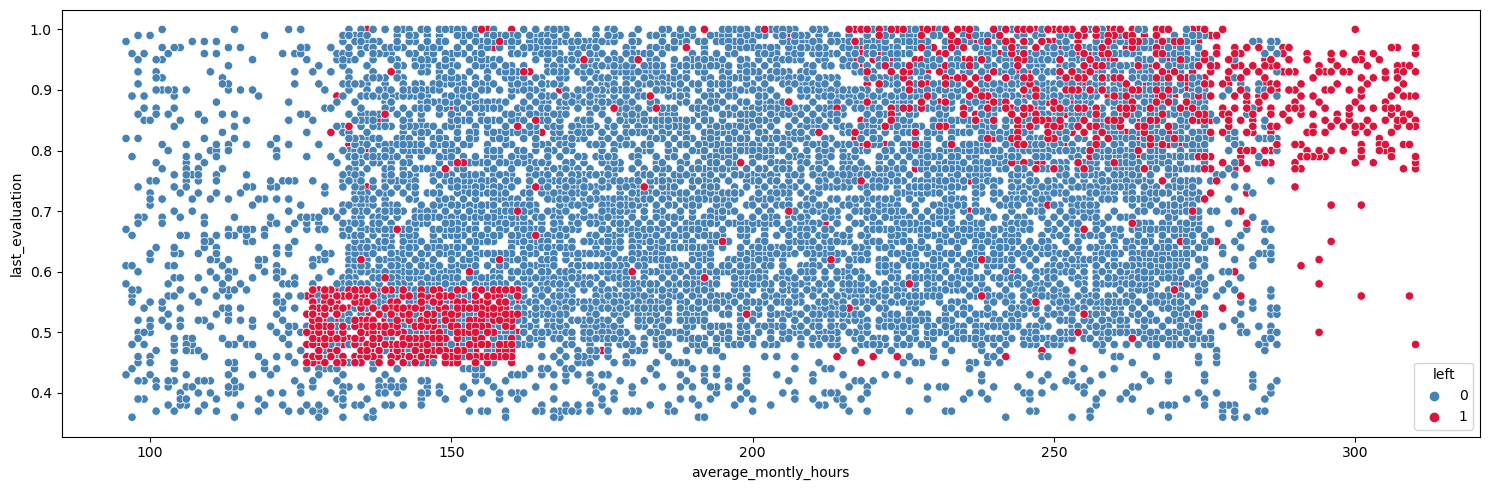

In [105]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=employees.average_montly_hours,
            y=employees.last_evaluation,
            hue=employees.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with high evaluation and working more than 217 hours tend to leave the company. Employees with evaluation around 0.5 and working between 125 and 161 hours tend to leave the company.

# Last Evaluation vs Satisfaction Level

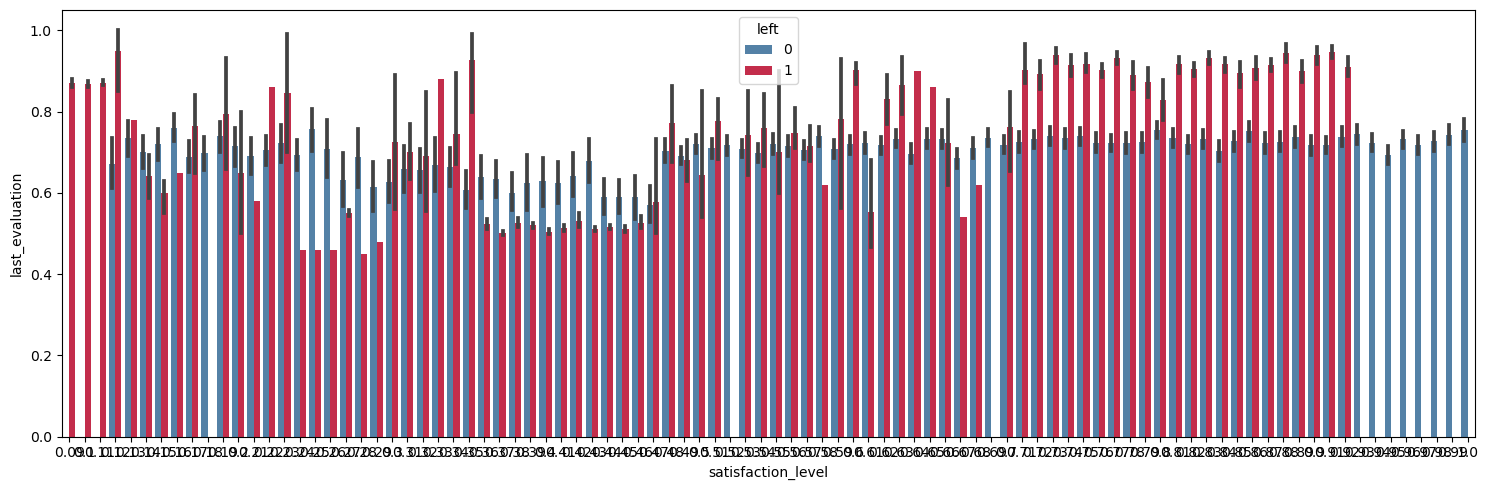

In [106]:
# Bar Plot with left values
plt.figure(figsize=(15,5))
sns.barplot(x=employees.satisfaction_level,
            y=employees.last_evaluation,
            hue=employees.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

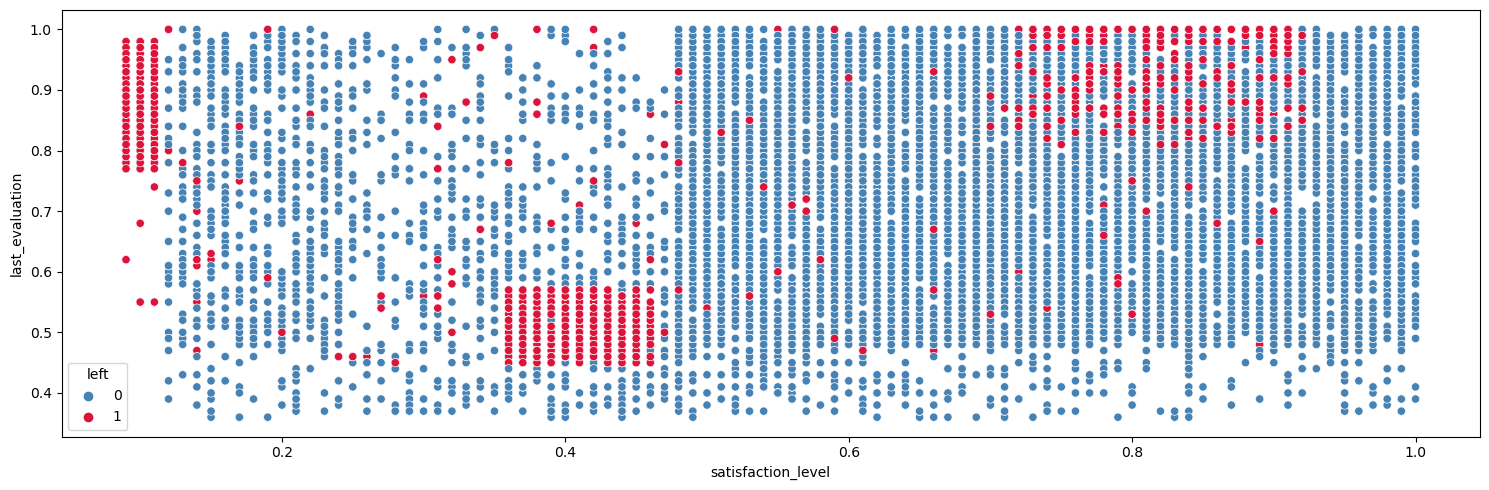

In [107]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=employees.satisfaction_level,
            y=employees.last_evaluation,
            hue=employees.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with satisfaction level below 0.11 tend to leave the company. Employees with satisfaction level between 0.35 and 0.46 and with last evaluation between 0.44 and 0.57 tend to leave the company. Employees with satisfaction level between 0.71 and 0.92 and with last evaluation between 0.76 and 1 tend to leave the company.

# Exploratory Data Analysis

In [75]:
# Count occurences of each values in left
employees['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [76]:
# Get the mean of each variable for the different values of left
employees.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years     sales    salary  
left                                             
0                  0.026251  3.408908  0.650945  
1                  0.005321  3.118734  0.414730

# Logistic Regression

In [117]:
employees.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0      0   
1                   6              0     1                      0      0   
2                   4              0     1                      0      0   
3                   5              0     1                      0      0   
4                   3              0     1                      0      0   

   salary  
0       0  
1       1  
2       1  
3       0  
4       0

In [118]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [119]:
X=employees[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','sales']]
X

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  sales  
0                       157                   3              0      0  
1                       262                   6              0      0  
2                       272                   4              0      0  
3                       223                   5              0      0  
4                       159                   3              0      0  
...                     ...                 ...            ...    ...  
14994                   151                   3              0      4  
14995                   160                   3              0      4  
14996                   143                   3              0      4  
14997                   280                   4              0      4  
14998                   158                   3              0      4  

[14999 rows x 7 columns]

# Modeling (Logistic Regression with Scikit-learn)

In [126]:
from sklearn.linear_model import LogisticRegression
LR_Model=LogisticRegression().fit(X_train,y_train)

In [127]:
LR_Model

LogisticRegression()

# Attribute of Logistic Regression Model

In [130]:
LR_Model.classes_

array([0, 1], dtype=int64)

In [131]:
LR_Model.coef_

array([[-4.09968989,  0.61069915, -0.30465965,  0.00440725,  0.24005581,
        -1.87600509, -0.62575029, -0.02526474, -0.69623645]])

In [132]:
LR_Model.intercept_

array([0.71794603])

In [133]:
LR_Model.n_features_in_

9

In [134]:
LR_Model.n_iter_

array([100])

# score(X, y, sample_weight=None)[source]
Return the mean accuracy on the given test data and labels.

In [135]:
LR_Model.score(X_test,y_test)

0.7978

# Classification metrics

In [136]:
y_pred=LR_Model.predict(X_test)

In [137]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [138]:
y_test.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3532,  296],
       [ 715,  457]], dtype=int64)

# The classification_report
The classification_report function builds a text report showing the main classification metrics.

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3828
           1       0.61      0.39      0.47      1172

    accuracy                           0.80      5000
   macro avg       0.72      0.66      0.67      5000
weighted avg       0.78      0.80      0.78      5000



In [141]:
len(y_test)

5000

# Model Building using sklearn.ensemble.RandomForestClassifier

In [149]:
from sklearn.ensemble import RandomForestClassifier
RFC_Model=RandomForestClassifier(n_estimators=100,criterion='gini').fit(X_train,y_train)
RFC_Model

RandomForestClassifier()

# Attributes of RandomForestClassifier Model Object

In [150]:
RFC_Model.estimator_

DecisionTreeClassifier()

In [151]:
RFC_Model.base_estimator_

DecisionTreeClassifier()

In [152]:
RFC_Model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=2118920062),
 DecisionTreeClassifier(max_features='sqrt', random_state=57434759),
 DecisionTreeClassifier(max_features='sqrt', random_state=1759016925),
 DecisionTreeClassifier(max_features='sqrt', random_state=1717641207),
 DecisionTreeClassifier(max_features='sqrt', random_state=567127302),
 DecisionTreeClassifier(max_features='sqrt', random_state=772817020),
 DecisionTreeClassifier(max_features='sqrt', random_state=1418367930),
 DecisionTreeClassifier(max_features='sqrt', random_state=478814805),
 DecisionTreeClassifier(max_features='sqrt', random_state=1544074758),
 DecisionTreeClassifier(max_features='sqrt', random_state=109311490),
 DecisionTreeClassifier(max_features='sqrt', random_state=1550138418),
 DecisionTreeClassifier(max_features='sqrt', random_state=465765048),
 DecisionTreeClassifier(max_features='sqrt', random_state=1321228749),
 DecisionTreeClassifier(max_features='sqrt', random_state=1140553655),
 DecisionTree

In [153]:
len(RFC_Model.estimators_)

100

In [154]:
RFC_Model.classes_

array([0, 1], dtype=int64)

In [155]:
RFC_Model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary'], dtype=object)

In [156]:
RFC_Model.feature_importances_

array([0.33792988, 0.12667467, 0.18907014, 0.14317364, 0.1753955 ,
       0.0056184 , 0.00099063, 0.01308173, 0.0080654 ])

In [157]:
max(RFC_Model.feature_importances_)

0.33792987952822284

# Visualize the RandomForestClassifier Decision Tree

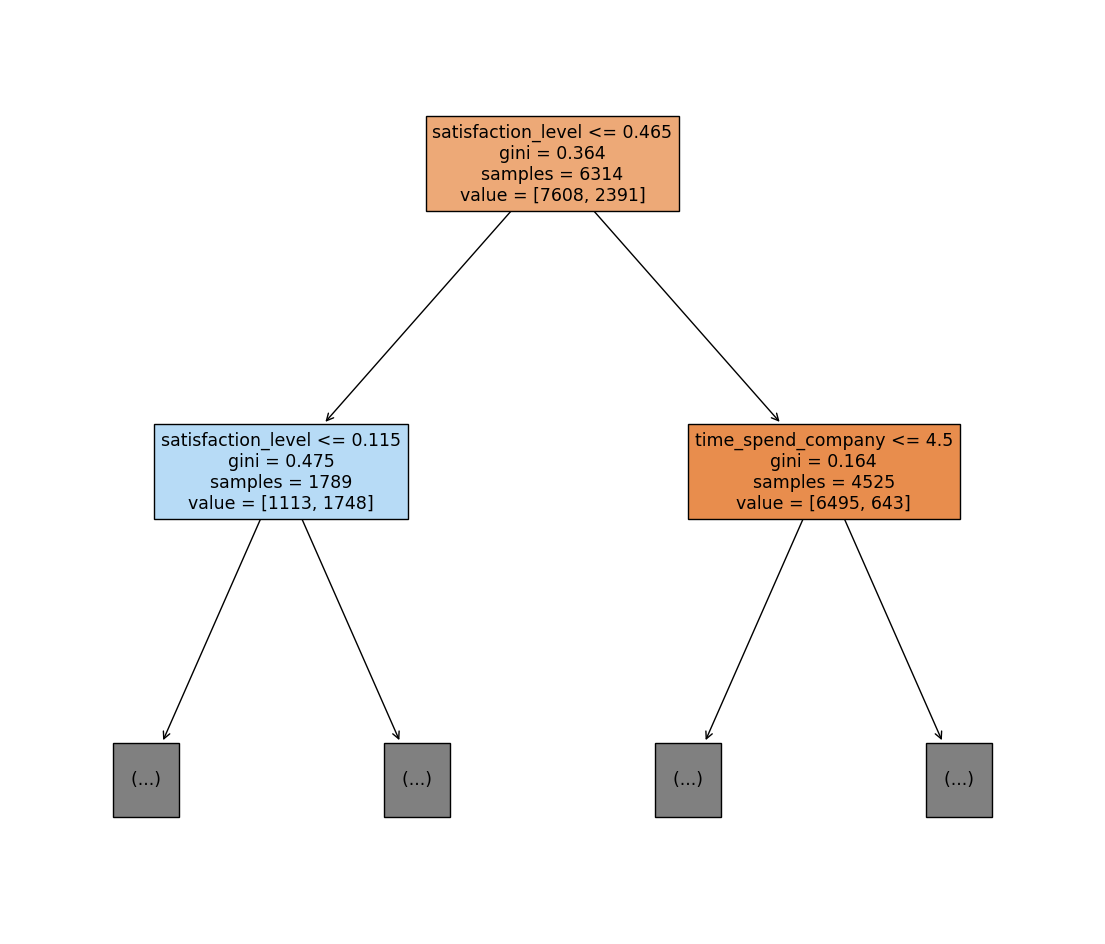

In [158]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,12))
plot_tree(RFC_Model.estimators_[99],filled=True,max_depth=1,feature_names=RFC_Model.feature_names_in_)
plt.show()

# Model Performance

In [159]:
RFC_Model.score(X_test,y_test)

0.9926

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7978

In [161]:
# y_pred
y_pred=RFC_Model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
# for Do select Result.csv

In [162]:
result=pd.DataFrame({'employees':y_pred})
result.to_csv('result.csv')

In [163]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[3823,    5],
       [  32, 1140]], dtype=int64)

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3828
           1       1.00      0.97      0.98      1172

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000

